<a href="https://colab.research.google.com/github/Jamolkhon5/TestPriject/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave 
import numpy as np
from google.colab import files
#from io import BytestIO
from PIL import Image
import matplotlib.pyplot as plt
from io import * 

In [50]:
upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))

Saving 321.jpg to 321.jpg


In [51]:
def processed_image(img):
  image = img.resize((256,256),Image.BILINEAR)
  image = np.array(image, dtype = float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  X,Y = lab[:,:,0], lab[:,:,1:]

  Y /=128
  X = X.reshape(1,size[0],size[1],1)
  Y = Y.reshape(1,size[0],size[1],2)
  return X, Y, size

In [52]:
X, Y, size = processed_image(img)

In [63]:
model = Sequential()
model.add(InputLayer(input_shape=(None,None,1)))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same', strides=2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same', strides=2))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same', strides=2))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(Conv2D(2,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))



In [64]:
model.compile(optimizer='adam', loss = 'mse')
model.fit(x=X, y=Y, batch_size=1, epochs=50)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.0051
Epoch 2/50
1/1 [==============================] - 1s 902ms/step - loss: 0.0084
Epoch 3/50
1/1 [==============================] - 1s 876ms/step - loss: 0.0082
Epoch 4/50
1/1 [==============================] - 1s 851ms/step - loss: 0.0081
Epoch 5/50
1/1 [==============================] - 1s 861ms/step - loss: 0.0081
Epoch 6/50
1/1 [==============================] - 1s 867ms/step - loss: 0.0081
Epoch 7/50
1/1 [==============================] - 1s 845ms/step - loss: 0.0081
Epoch 8/50
1/1 [==============================] - 1s 854ms/step - loss: 0.0081
Epoch 9/50
1/1 [==============================] - 1s 813ms/step - loss: 0.0081
Epoch 10/50
1/1 [==============================] - 1s 829ms/step - loss: 0.0081
Epoch 11/50
1/1 [==============================] - 1s 882ms/step - loss: 0.0081
Epoch 12/50
1/1 [==============================] - 1s 863ms/step - loss: 0.0081
Epoch 13/50
1/1 [==============================] - 1

In [55]:
upl = files.upload()

Saving 321.jpg to 321 (1).jpg


In [56]:
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))
X,Y,size = processed_image(img)

1/1 [==============================] - 0s 326ms/step


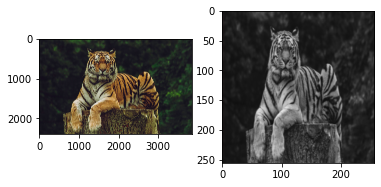

In [60]:
output = model.predict(X)
output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0],size[1],3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(lab2rgb(cur))
